In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 15.5 MB/s eta 0:00:00


In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Memuat model jerawat dan model jenis kulit
acne_model = load_model("/content/drive/MyDrive/model fix/acne_grade_model.h5")
skin_type_model = load_model("/content/drive/MyDrive/model fix/skintypes_detection_model.h5")
acne_types_model = YOLO('/content/drive/MyDrive/model fix/best_model.pt')


image 1/1 /content/drive/MyDrive/BEAUSKIN ML/bws2.jpg: 640x576 (no detections), 583.9ms
Speed: 4.2ms preprocess, 583.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 576)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

image 1/1 /content/drive/MyDrive/istockphoto-1069975106-612x612.jpg: 640x480 (no detections), 522.2ms
Speed: 3.0ms preprocess, 522.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

image 1/1 /content/drive/MyDrive/BEAUSKIN ML/ACNE_DETECTION/train/Acne/24.jpg: 512x640 7 papuless, 1 pustules, 528.6ms
Speed: 3.2ms preprocess, 528.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

image 1/1 /content/istockphoto-2166181518-612x612.jpg: 448x640 1 pustules, 454.4ms
Speed: 2.8ms preprocess, 454.4ms inference, 1.0ms postprocess per image at shape (

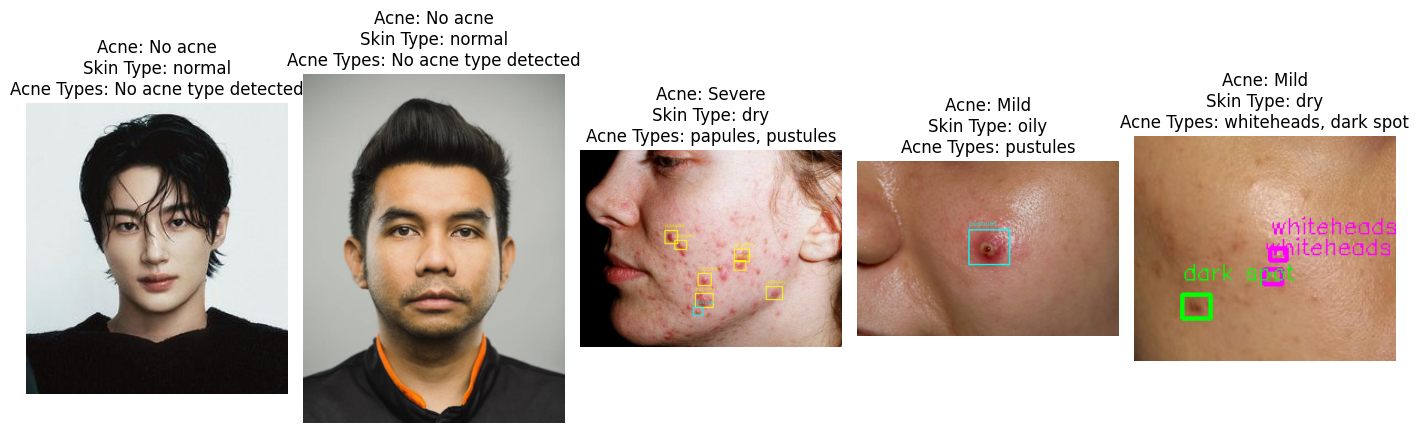

In [29]:
# Define fixed colors for each label in the YOLO model
label_colors = {
    'blackheads': (255, 0, 0),    # Red
    'dark spot': (0, 255, 0),     # Green
    'nodules': (0, 0, 255),       # Blue
    'papules': (255, 255, 0),     # Yellow
    'pustules': (0, 255, 255),    # Cyan
    'whiteheads': (255, 0, 255)   # Magenta
}

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/BEAUSKIN ML/bws2.jpg',
    '/content/drive/MyDrive/istockphoto-1069975106-612x612.jpg',
    '/content/drive/MyDrive/BEAUSKIN ML/ACNE_DETECTION/train/Acne/24.jpg',
    '/content/istockphoto-2166181518-612x612.jpg',
    '/content/drive/MyDrive/BEAUSKIN ML/tingkatan jerawat/train/Mild/1 (1).jpg'
]

# Functions for preprocessing images and predicting acne and skin type
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Normalize image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

def get_acne_label_name(prediction):
    class_labels = {0: "Mild", 1: "Moderate", 2: "No acne", 3: "Severe"}
    predicted_index = prediction.argmax()  # Get index of highest probability
    return class_labels.get(predicted_index, "Unknown")

def get_skin_type_label_name(label):
    skin_type_labels = {0: 'dry', 1: 'normal', 2: 'oily'}
    return skin_type_labels.get(label, "Unknown")

# Create figure for displaying images
fig, axes = plt.subplots(1, len(image_paths), figsize=(14, 7))

# Loop through each image for detection and prediction
for idx, image_path in enumerate(image_paths):
    # Predict with YOLO for acne detection
    results = acne_types_model.predict(image_path)

    # Read the image for display
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying

    # Collect detected acne types
    detected_acne_types = []

    # Process each bounding box in YOLO results
    for box in results[0].boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Get coordinates of bounding box
        label = int(box.cls[0].item())  # Get class label
        conf = box.conf[0].item()  # Get confidence score

        label_name = acne_types_model.names[label]  # Get the label name from YOLO
        color = label_colors.get(label_name, (255, 255, 255))  # Get fixed color for each label

        # Add the acne type to the list if not already present
        if label_name not in detected_acne_types:
            detected_acne_types.append(label_name)

        # Draw bounding box and label on image
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(img_rgb, f'{label_name}', (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Preprocess the image for additional acne and skin type predictions
    preprocessed_image = preprocess_image(image_path, target_size=(128, 128))

    # Assume you have a model for acne and skin type prediction (this is an example, replace with your actual model)
    acne_prediction = acne_model.predict(preprocessed_image)
    acne_condition = get_acne_label_name(acne_prediction)

    skin_type_prediction = skin_type_model.predict(preprocessed_image)
    skin_type_label = np.argmax(skin_type_prediction, axis=1)[0]
    skin_type_name = get_skin_type_label_name(skin_type_label)

    # Prepare the list of detected acne types as a string
    acne_types_str = ', '.join(detected_acne_types) if detected_acne_types else "No acne type detected"

    # Display the image with bounding boxes and predictions on subplots
    axes[idx].imshow(img_rgb)
    axes[idx].axis('off')

    # Show predictions (Acne condition and Skin type)
    axes[idx].set_title(f"Acne: {acne_condition}\nSkin Type: {skin_type_name}\nAcne Types: {acne_types_str}")

# Show the images with bounding boxes and predictions
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


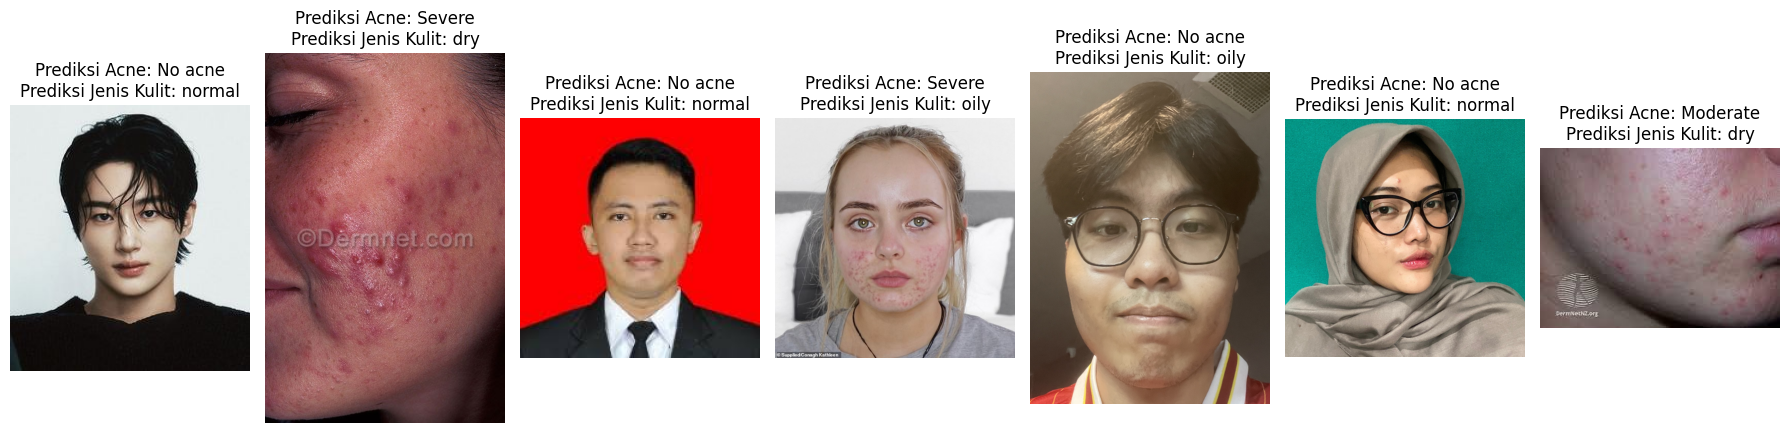

In [30]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi preprocess untuk mempersiapkan gambar (dengan ukuran target yang sama)
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Normalisasi gambar
    image_array = np.expand_dims(image_array, axis=0)  # Menambahkan batch dimension
    return image_array

# Fungsi untuk mendapatkan nama label berdasarkan hasil prediksi (Acne)
def get_acne_label_name(prediction):
    # Definisikan label kelas sesuai dengan urutan output model
    class_labels = {0: "Mild", 1: "Moderate", 2: "No acne", 3: "Severe"}

    # Cari indeks kelas dengan probabilitas tertinggi
    predicted_index = prediction.argmax()  # prediction adalah array numpy atau tensor

    # Ambil nama label berdasarkan indeks prediksi
    predicted_class = class_labels[predicted_index]

    return predicted_class

# Fungsi untuk mendapatkan nama label berdasarkan hasil one-hot encoding (Jenis Kulit)
def get_skin_type_label_name(label):
    skin_type_labels = {0: 'dry', 1: 'normal', 2: 'oily'}
    return skin_type_labels.get(label, "Unknown")

# Fungsi untuk menampilkan gambar
def show_image(image_path, ax):
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis("off")

# Path ke gambar pertama dan kedua yang ingin dianalisis
image_paths = [
    '/content/drive/MyDrive/BEAUSKIN ML/bws2.jpg',
    '/content/drive/MyDrive/BEAUSKIN ML/ACNE_DETECTION/train/Acne/54.jpg',
    # '/content/drive/MyDrive/BEAUSKIN ML/dataset jerawat/Moderate/gambarsasdsd.jpg',
    '/content/drive/MyDrive/advisor.jpeg',
    # '/content/drive/MyDrive/BEAUSKIN ML/hoshi.jpg',
    '/content/drive/MyDrive/BEAUSKIN ML/ACNE_DETECTION/train/Acne/10.jpg',
    # '/content/drive/MyDrive/BEAUSKIN ML/tingkatan jerawat/train/Mild/1 (1).jpg',
    '/content/drive/MyDrive/S__18137096.jpg',
    # '/content/drive/MyDrive/Muhammad-Aji-2.png',
    '/content/drive/MyDrive/waf.jpg',
    # # '/content/drive/MyDrive/waf.jpg'
    # '/content/drive/MyDrive/BEAUSKIN ML/dataset jerawat/Moderate/2 (101).jpg',
    '/content/drive/MyDrive/BEAUSKIN ML/dataset jerawat/Moderate/images (10).jpeg'
    # '/content/66305fb9d75a6482061290.jpeg',
    # '/content/oilyyyy.jpg',
    # '/content/drive/MyDrive/dryskin.jpg',
    # '/content/hipoparatiroid-bisa-sebabkan-kulit-kering-bersisik-2.jpg'
]

# Membuat figure dengan 2 subplot untuk menampilkan dua gambar
fig, axes = plt.subplots(1, 7, figsize=(18, 7))

# Proses setiap gambar
for idx, image_path in enumerate(image_paths):
    preprocessed_image = preprocess_image(image_path, target_size=(128, 128))

    # Prediksi dengan model acne
    acne_prediction = acne_model.predict(preprocessed_image)
    acne_condition = get_acne_label_name(acne_prediction)

    # Prediksi dengan model skin type
    skin_type_prediction = skin_type_model.predict(preprocessed_image)
    skin_type_label = np.argmax(skin_type_prediction, axis=1)[0]
    skin_type_name = get_skin_type_label_name(skin_type_label)

    # Menampilkan gambar dan prediksi pada subplot
    show_image(image_path, axes[idx])
    axes[idx].set_title(f"Prediksi Acne: {acne_condition}\nPrediksi Jenis Kulit: {skin_type_name}")

# Menampilkan gambar
plt.tight_layout()
plt.show()